# Takes two to Data Clean

by [Raul Maldonado](https://www.linkedin.com/in/raulm8/)

## <center>Have You Asked This Question Before?</center>

1. Why does my forecasting model underperform from expected test results? 

2. What's this random  <font color = "red">TypeError: Can't convert 'bytes' object to str implicitly</font> error I keep seeing?

3. Why didn't my workflow fire? or WHY THE HECK DID MY WORFLOW FIRE?

4. What in the heck is this **nÃ„Ã–ÃœÃ¤Ã¶Ã¼ÃŸ**?


It's not you, it's the data---or you too. Regardless, it's time to do some "spring cleaning!"


## <center>You, Yourself, and Data</center>

I can discuss what Data Cleaning is and how it is important, but I will not do that. Rather, I would like to present some approaches to keep in mind as you clean production information originating through data wrangling or had delivered through some data vendor. 

Coming into data cleaning, you may not only need your team, but you need two perspectives of the data cleaning process. Data professionals must have **business/domain** knowledge and **technical** knowledge.


## <center> Well, That's Trivial </center>

You may think having business and technical knowledge may be trivial, but let's consider some of the issues from our questions earlier:

### 1. Why does my forecasting model underperform from expected test results? 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import sklearn as sk
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
#Import Same datasets for both bad and good NBA information
nba_df = pd.read_csv("nba_2016_2017_playerData.csv")
nba_df_actual = pd.read_csv("nba_2016_2017_playerData.csv")

#Is Lebron James and Active Twitter User?
print(nba_df[nba_df["PLAYER_NAME"]=="LeBron James"]["ACTIVE_TWITTER_LAST_YEAR"])

#Respectively change "Active Twitter Last Year"
#Variable to False for Lebron James, Russel WestBrook,
#Kevin Durant, and Anthony Davis,
nba_df.loc[6,"ACTIVE_TWITTER_LAST_YEAR"] = 0
nba_df.loc[0,"ACTIVE_TWITTER_LAST_YEAR"] = 0
nba_df.loc[3,"ACTIVE_TWITTER_LAST_YEAR"] = 0
nba_df.loc[5,"ACTIVE_TWITTER_LAST_YEAR"] = 0

#Confirmation of altering information
print(nba_df[nba_df["PLAYER_NAME"]=="LeBron James"]["ACTIVE_TWITTER_LAST_YEAR"])

#Feature and Target selections for Linear Regression
features_cols = ["PTS","W","SALARY_MILLIONS","OFF_RATING","MIN","ACTIVE_TWITTER_LAST_YEAR"]
target_col = ["TWITTER_FOLLOWER_COUNT_MILLIONS"]

6    1
Name: ACTIVE_TWITTER_LAST_YEAR, dtype: int64
6    0
Name: ACTIVE_TWITTER_LAST_YEAR, dtype: int64


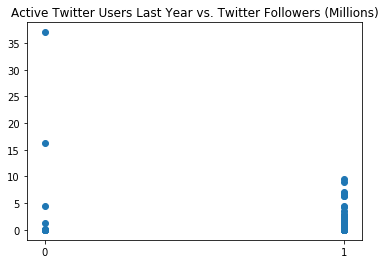

In [2]:
#Scenario 1 (misinformation)
nba_df_features = nba_df[features_cols]
nba_df_targets = nba_df[target_col]
lm = LinearRegression()
lm.fit(nba_df_features,nba_df_targets)
#print("Model Intercept: ",lm.intercept_, "\nAnd Model Coefficients: ",lm.coef_)

lsa = list(nba_df_features.columns)
main_list = []
for i in range(len(lsa)):
    main_list.append([lsa[i], lm.coef_[0][i]])
analysis = pd.DataFrame(main_list,columns = ["features","estimatedCoefficients"])

plt.scatter(nba_df["ACTIVE_TWITTER_LAST_YEAR"],nba_df["TWITTER_FOLLOWER_COUNT_MILLIONS"])
plt.title("Active Twitter Users Last Year vs. Twitter Followers (Millions)")
plt.xticks([0,1])
plt.show()

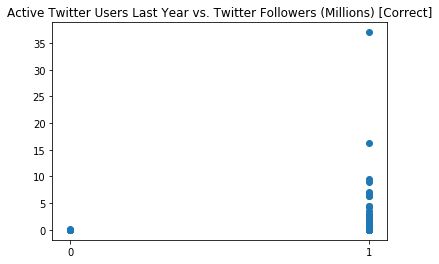

In [3]:
#Scenario 2 (Correct information)
nba_df_features_act = nba_df_actual[features_cols]
nba_df_targets_act = nba_df_actual[target_col]
lm = LinearRegression()
lm.fit(nba_df_features_act,nba_df_targets_act)
#print("Model Intercept: ",lm.intercept_, "\nAnd Model Coefficients: ",lm.coef_)

lsa = list(nba_df_features.columns)
main_list = []
for i in range(len(lsa)):
    main_list.append([lsa[i], lm.coef_[0][i]])
analysis = pd.DataFrame(main_list,columns = ["features","estimatedCoefficients"])

plt.scatter(nba_df_actual["ACTIVE_TWITTER_LAST_YEAR"],nba_df_actual["TWITTER_FOLLOWER_COUNT_MILLIONS"])
plt.title("Active Twitter Users Last Year vs. Twitter Followers (Millions) [Correct]")
plt.xticks([0,1])
plt.show()

**First Model (Incorrection Information):**

$y = -13.0449 + {0.07678}{x_1} +{0.01388}{x_2}+{0.18488792}{x_3}+{0.14309988}{x_4}-{0.08190133}{x_5}-{2.69398}{x_6}$ for $ x_i \in \text{Features where } i ={1,2,3,4,5,6}$

**Second Model (Correct Information):**

$y = -13.0449 + {0.1568}{x_1} +{0.01741}{x_2}+{0.2257}{x_3}+{0.1188}{x_4}-{0.1615}{x_5}+{2.05337}{x_6}$ for $ x_i \in \text{Features where } i ={1,2,3,4,5,6}$


### 2.Values Means

In [4]:
df_valueEval = pd.read_csv("youtubeVid_mainSubset_corrupt1.csv")
df_valueEval[df_valueEval["channel_title"]=="5-Minute Crafts"].tail(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Country,likes_prop,dislikes_prop,like_ratio,category_name
817,_9YMpuLDnwo,2017-12-05,42 HOLY GRAIL HACKS THAT WILL SAVE YOU A FORTUNE,5-Minute Crafts,26.0,2017-12-03T08:30:00.000Z,"5-Minute Crafts|""DIY""|""Do it yourself""|""crafts...",10883016.0,100510.0,21627.0,...,https://i.ytimg.com/vi/_9YMpuLDnwo/default.jpg,False,False,False,Subscribe to 5-Minute Crafts KIDS: https://goo...,DE,0.822928,0.177072,4.647431,Howto & Style
818,_9YMpuLDnwo,2017-12-05,42 HOLY GRAIL HACKS THAT WILL SAVE YOU A FORTUNE,5-Minute Crafts,26.0,2017-12-03T08:30:00.000Z,"5-Minute Crafts|""DIY""|""Do it yourself""|""crafts...",10883016.0,100510.0,21627.0,...,https://i.ytimg.com/vi/_9YMpuLDnwo/default.jpg,False,False,False,Subscribe to 5-Minute Crafts KIDS: https://goo...,FR,0.822928,0.177072,4.647431,Howto & Style
819,_9YMpuLDnwo,2017-12-11,42 HOLY GRAIL HACKS THAT WILL SAVE YOU A FORTUNE,5-Minute Crafts,26.0,2017-12-03T08:30:00.000Z,"5-Minute Crafts|""DIY""|""Do it yourself""|""crafts...",54155921.0,378111.0,66632.0,...,https://i.ytimg.com/vi/_9YMpuLDnwo/default.jpg,False,False,False,Subscribe to 5-Minute Crafts KIDS: https://goo...,USA,0.850179,0.149821,5.674616,Howto & Style


In [5]:
df_valueEval[df_valueEval["channel_title"]=="5-Minute Crafts"]["views"].sum()

186229186.0


### 3. Why didn't my workflow fire? or WHY THE HECK DID MY WORFLOW FIRE?

Within Customer Relationship Management (CRM) systems, typcially dynamic workflows, processes, and other logic are the root of dirty and unclear data. This is one of the main reasons why CRM tends to has its disadvantage; this is not a system failure, it's a management one. Cleaning data is not easy, it takes time and dedication but it's highly doable in a structured way and one of the most important things you can do.

![WorkflowCeption](workflow-image.jpg)


Measures to avoid bad data within CRMS, say Salesforce, are:

1. Correct management with Validation Rules for data entry

2. Logical Workflow rules that ensure quality information and/or updates through mising information through a Sales Process.
    
    a. As an example, a Workflow Rule could update some additional custom billing information when an Opportunity is "Closed Won"

3. Additional Apps through AppExchange
    
    a. [Dupecatcher](https://appexchange.salesforce.com/listingDetail?listingId=a0N30000003IYLlEAO)
    
    b. [Addresstools](https://appexchange.salesforce.com/listingDetail?listingId=a0N30000002zt9uEAA)
    
    c.[ Cloudingo](https://appexchange.salesforce.com/listingDetail?listingId=a0N30000004gHkoEAE)
    
Note: Outside the CRM world, maybe you can consider OpenRefine by Google IBM Data Refinery. Haven't researched or utilized those products, but I know they exist.

### 4. What in the heck is this nÃ„Ã–ÃœÃ¤Ã¶Ã¼ÃŸ and what is  What's this random  "TypeError: Can't convert 'bytes' object to str implicitly" error I keep seeing?

In [6]:
#Adding String to bytes object/string
##And thereafter receive convert  'bytes' issue
text = "Fu\u00dfb\u00e4lle"
data = b" sind rund"
text + data

TypeError: must be str, not bytes

In [ ]:
#Resolving Type Error by decoding "data"
text + data.decode("utf-8")

In [ ]:
youtubeVids_df = pd.read_csv("youtubeVid_mainSubset.csv")

However, you first encounter a the above error <font color= "red">UnicodeDecodeError:</font> 'utf-8' codec can't decode byte 0xf6 in position 1: invalid start byte. This issue could had been simply avoided if the user had decoded the information with "utf-8" coding.

Once one would properly do the encoding, we receiving the following dataset!

In [ ]:
youtubeVids_df = pd.read_csv("youtubeVid_mainSubset3.csv")
youtubeVids_df.head()

In [ ]:
string_emoji = youtubeVids_df["title"][4][9]
str_emoji_encoded= string_emoji.encode()
str_emoji_encoded.decode()
string_emoji

Happy Holidays?

## <center>Oh...</center>

And now you understand the complications of data, and the two perspectives for forensic analysis of why and what dirty data exists that affect your Analysis lifecycle.

However, there are other factors to consider in data cleaning which I have not covered. They are the following


1. Delete, Modify, or Impoute Observations With Missing Values
3. Detecting and Handling Outliers
4. Discretize Features
5. Handling Imbalanced Classes With Downsampling and Upsampling
6. Normalizing Observations
7. And more!


And to mitigate data issues, ensure:

1. Datatype constraints
2. Real-time validation
3. requirement validations
4. unique constraints
5. and other preferred requirements!